# 데이터를 들어보는 프로그램

In [6]:
import pandas as pd
from IPython.display import Audio, display
import librosa
import matplotlib.pyplot as plt

In [12]:
sr = 32000
seed = 42
# seed = 123
# seed = 9903
train_file = "train.csv"
test_file = "test.csv"

In [13]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
train_df.head(3)

,id,path,label
0,RUNQPNJF,./train/RUNQPNJF.ogg,real
1,JFAWUOGJ,./train/JFAWUOGJ.ogg,fake
2,RDKEKEVX,./train/RDKEKEVX.ogg,real


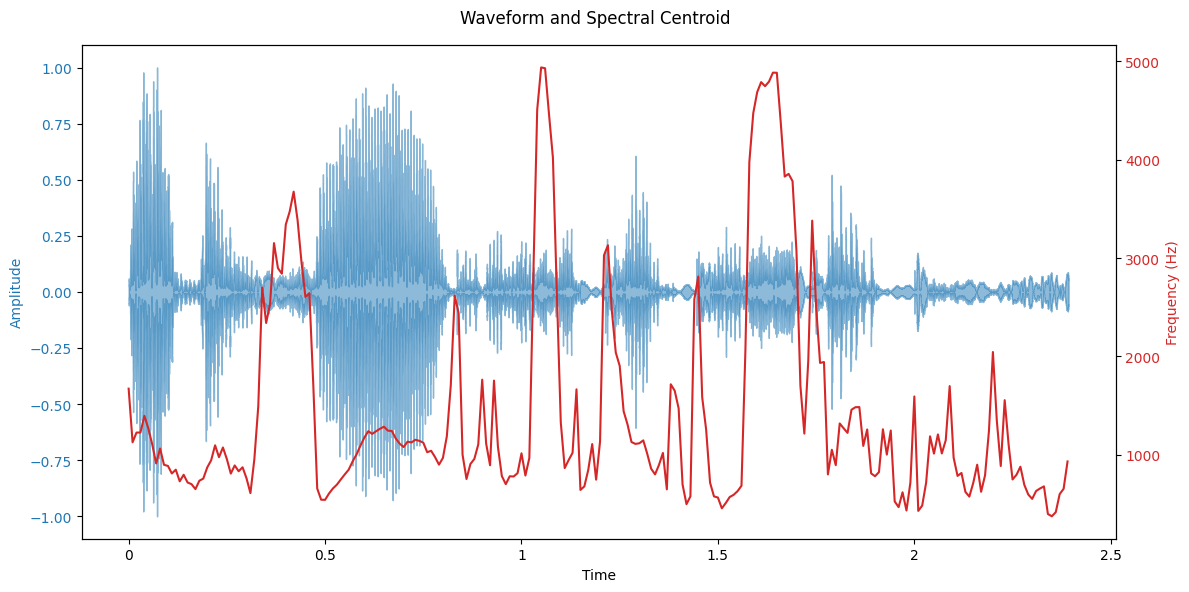

In [22]:
# 오디오 파일 로드
filename = './train/RUNQPNJF.ogg'  # 오디오 파일 경로를 지정하세요
y, sr = librosa.load(filename, sr=None)

# n_fft와 hop_length 설정
frame_size_ms = 25  # 프레임 크기를 25ms로 설정
hop_size_ms = 10    # 홉 크기를 10ms로 설정

n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

# 스펙트럴 센트로이드 계산
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)[0]

# 프레임 번호를 시간 값으로 변환
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 원래 파형 시각화
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude', color=color)
librosa.display.waveshow(y, sr=sr, alpha=0.5, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

# 스펙트럴 센트로이드 시각화
ax2 = ax1.twinx()  # 공유 x축을 사용하여 두 번째 y축 생성
color = 'tab:red'
ax2.set_ylabel('Frequency (Hz)', color=color)
ax2.plot(t, spectral_centroids, color=color, label='Spectral Centroid')
ax2.tick_params(axis='y', labelcolor=color)

# 제목 및 범례 설정
fig.suptitle('Waveform and Spectral Centroid')
fig.tight_layout()  # 그래프 요소 간격 조정
plt.show()

In [6]:
train_sample_real_df = train_df[train_df['label'] == "real"].sample(n=5, random_state=seed)
train_sample_fake_df = train_df[train_df['label'] == "fake"].sample(n=5, random_state=seed)
test_sample_df = test_df.sample(n=5, random_state=seed)

## train real  
방음 환경에서의 진짜 사람 목소리와 가짜 생성 목소리   
각 샘플 당 한명의 목소리

In [7]:
for index, row in train_sample_real_df.iterrows():
    audio_file = row['path']
    print(f"Playing audio file: {audio_file}, Label: {row['label']}")
    display(Audio(audio_file))

Playing audio file: ./train/FXBOIRJD.ogg, Label: real


Playing audio file: ./train/UFUVJPJJ.ogg, Label: real


Playing audio file: ./train/KAUHLOQF.ogg, Label: real


Playing audio file: ./train/CWCSEJIQ.ogg, Label: real


Playing audio file: ./train/VONQSLDE.ogg, Label: real


## train fake

In [8]:
for index, row in train_sample_fake_df.iterrows():
    audio_file = row['path']
    print(f"Playing audio file: {audio_file}, Label: {row['label']}")
    display(Audio(audio_file))

Playing audio file: ./train/CJBSPRHA.ogg, Label: fake


Playing audio file: ./train/MHIVJAPA.ogg, Label: fake


Playing audio file: ./train/HMLTULCO.ogg, Label: fake


Playing audio file: ./train/HOXNWKYN.ogg, Label: fake


Playing audio file: ./train/LHNHVUFV.ogg, Label: fake


## test
5초 분량   
방음 환경/그렇지 않은 환경(배경음악이 있다)   
최대 2개의 목소리(둘 다 real이거나 fake)

In [9]:
for index, row in test_sample_df.iterrows():
    audio_file = row['path']
    print(f"Playing audio file: {audio_file}")
    display(Audio(audio_file))

Playing audio file: ./test/TEST_33553.ogg


Playing audio file: ./test/TEST_09427.ogg


Playing audio file: ./test/TEST_00199.ogg


Playing audio file: ./test/TEST_12447.ogg


Playing audio file: ./test/TEST_39489.ogg
